# Data analysis for predicting whether a mammogram is benign or malignant

For this analysis the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass) was utilized.



# Data Set Information:

Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 
70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years.These systems help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead. 

Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign) to 5 (highly suggestive of malignancy) assigned in a double-review process by physicians. Assuming that all cases with BI-RADS assessments greater or equal 
a given value (varying from 1 to 5), are malignant and the other cases benign, sensitivities and associated specificities can be calculated. These can be an indication of how well a CAD system performs compared to the radiologists. 

Class Distribution: benign: 516; malignant: 445 


# Attribute Information:

6 Attributes in total (1 goal field, 1 non-predictive, 4 predictive attributes) 

1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!) 
(BI-RADS stands for Breast Imaging Reporting and Data System and was established by the American College of Radiology)
2. Age: patient's age in years (integer) 
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal) 
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal) 
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal) 
6. Severity: benign=0 or malignant=1 (binominal, goal field!) 


# Missing Attribute Values: 
- BI-RADS assessment: 2 
- Age: 5 
- Shape: 31 
- Margin: 48 
- Density: 76 
- Severity: 0 

# Some Useful methods and libraries:

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix
#Visualization
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
masses_data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [17]:
masses_data.dropna(inplace=True)
masses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     830 non-null float64
age         830 non-null float64
shape       830 non-null float64
margin      830 non-null float64
density     830 non-null float64
severity    830 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.4 KB


In [18]:
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


We start analyzing and check for some insights about malignant tumors

In [19]:
masses_data[masses_data["severity"] ==1].head(20)

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1
11,3.0,42.0,2.0,1.0,3.0,1
17,4.0,59.0,2.0,1.0,3.0,1
18,4.0,54.0,1.0,1.0,3.0,1
21,5.0,56.0,4.0,3.0,1.0,1
23,5.0,42.0,4.0,4.0,3.0,1
24,4.0,59.0,2.0,4.0,3.0,1


youngest with malignant tumor is:

In [20]:
masses_data[masses_data["severity"] ==1].age.min()

28.0

Oldest with benign tumor

In [21]:
masses_data[masses_data["severity"] ==0].age.max()

86.0

Maybe this doesn't give us enough information.. age is not the only attribute 

Let's check observations with missing data and see if we can only ignore it for our prediction algorithm

In [22]:
masses_data.loc[(masses_data['age'].isnull()) |
              (masses_data['shape'].isnull()) |
              (masses_data['margin'].isnull()) |
              (masses_data['density'].isnull())]

,BI-RADS,age,shape,margin,density,severity


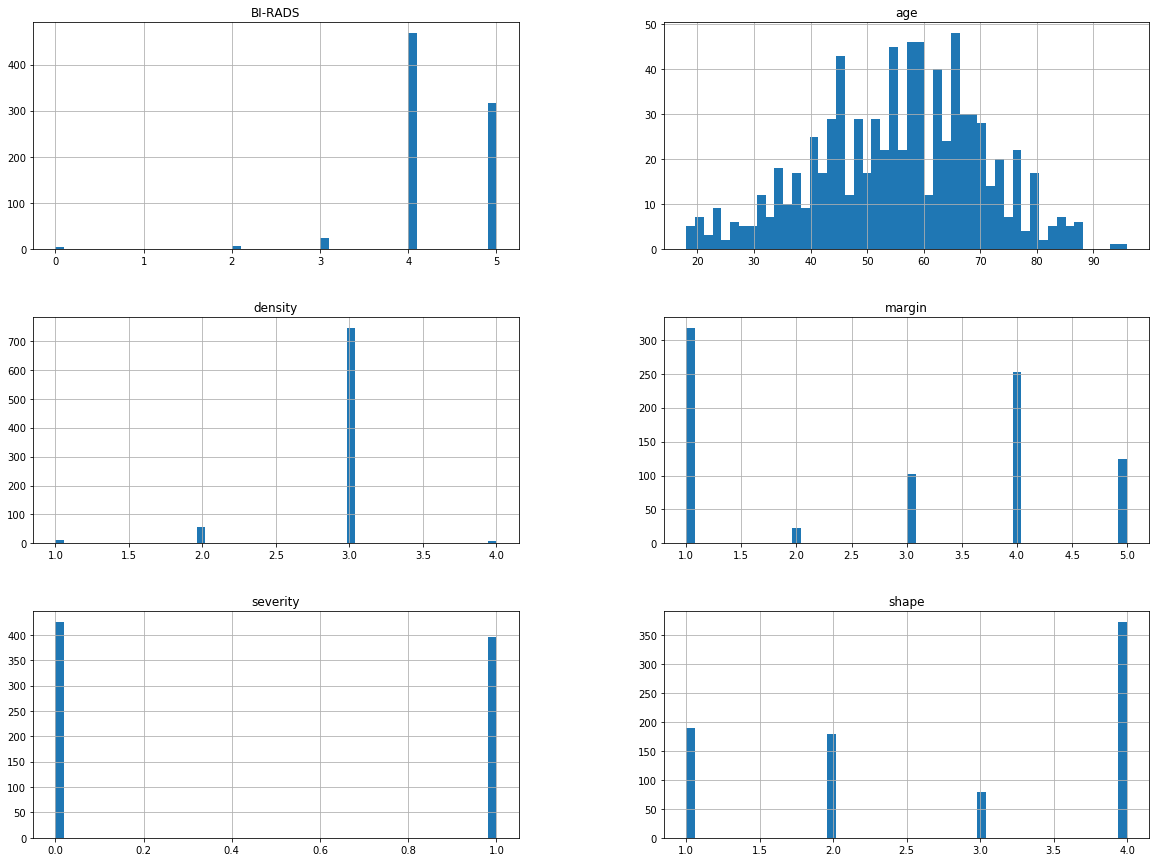

In [23]:
masses_data[masses_data["BI-RADS"] <6].hist(bins=50,figsize=(20,15))
plt.show()

In [24]:
byshape = masses_data.groupby("shape").severity.value_counts(normalize = True)
byshape.unstack()

severity,0,1
shape,,
1.0,0.831579,0.168421
2.0,0.827778,0.172222
3.0,0.481481,0.518519
4.0,0.213720,0.786280


In [25]:
bydensity = masses_data.groupby("density").severity.value_counts(normalize = True)
bydensity.unstack()

severity,0,1
density,,
1.0,0.545455,0.454545
2.0,0.678571,0.321429
3.0,0.501987,0.498013
4.0,0.500000,0.500000


Maybe we can stop taking density into account for our prediction model, however I'll leave it this way by the moment

In [26]:
bymargin = masses_data.groupby("margin").severity.value_counts(normalize = True)
bymargin.unstack()
#This one also seems to have some relation with severity

severity,0,1
margin,,
1.0,0.881250,0.118750
2.0,0.347826,0.652174
3.0,0.367925,0.632075
4.0,0.303150,0.696850
5.0,0.165354,0.834646


Doing scatter plots for categorical data may not be helpful...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016005467978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001600520D550>]], dtype=object)

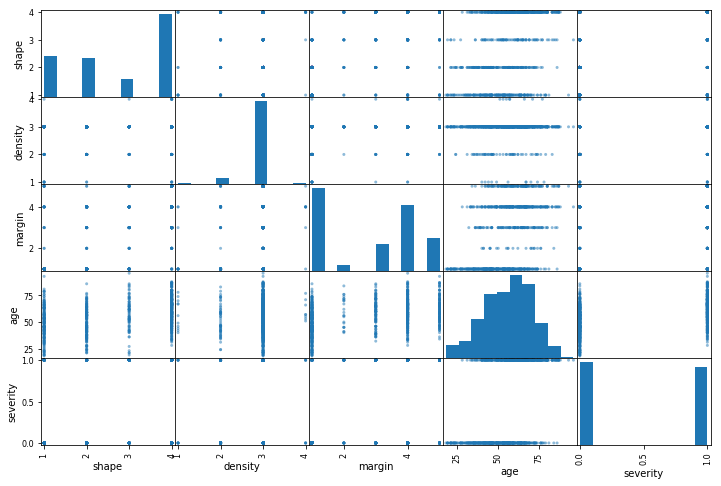

In [27]:
scatter_matrix(masses_data[["shape","density","margin","age","severity"]], figsize=(12, 8))

In [28]:
categories = np.linspace(masses_data.age.min(),masses_data.age.max(),4)

masses_data["ageGroup"] = pd.cut(masses_data.age,[25,50,75,100], labels = ["25-50","50-75","75-100"])
byage = masses_data.groupby("ageGroup").severity.value_counts()
byage.unstack()

byagen= masses_data.groupby("ageGroup").severity.value_counts(normalize =True)
byagen.unstack()

severity,0,1
ageGroup,,
25-50,0.738636,0.261364
50-75,0.417910,0.582090
75-100,0.140845,0.859155


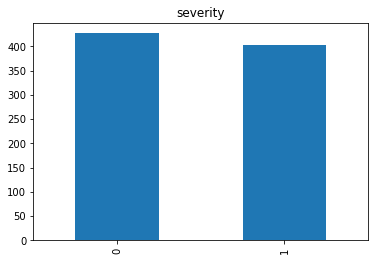

In [29]:
plt.figure(figsize=(6,4));masses_data.severity.value_counts().plot(kind="bar");plt.title("severity")


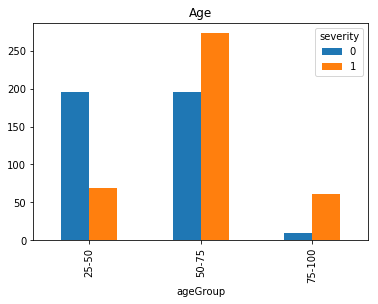

In [30]:
plt.figure(figsize=(6,4));byage.unstack().plot(kind="bar");plt.title("Age")

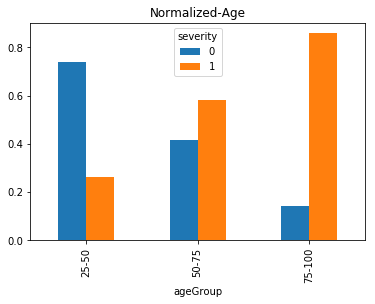

In [31]:
plt.figure(figsize=(6,4));byagen.unstack().plot(kind="bar");plt.title("Normalized-Age")

# Conclusions on Data

Age, margin and shape may be the attributes with strongest correlation with severity. A trial without taking into account density may be helpful in determining the best algorithm for predicting severity.

We decided to drop observations with missing values because imputation may not be the best solution for medical algorithms